In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import seaborn as sns
import time

from game import *
from utils import *
from plots import *
from agents import *
from T4T import *

palette = sns.color_palette("colorblind")
sns.set_palette(palette)
sns.set(context='paper', style='white', font='CMU Serif', rc={'font.size':12, 'mathtext.fontset': 'cm'})

In [25]:
def run(agents, nGames, opponent, verbose=False):
    dfs = []
    for a, agent in enumerate(agents):
        if verbose: print(f"{agent.ID}")
        if opponent=='greedy':
            t4ts = make_greedy_trustees(nGames, seed=a)
        elif opponent=='generous':
            t4ts = make_generous_trustees(nGames, seed=a)
        for g in range(nGames):
            if verbose: print(f"game {g}")
            df = play_game(agent, t4ts[g], gameID=g, train=True)
            dfs.extend(df)
        del(agent)
    data = pd.concat(dfs, ignore_index=True)
    return data

In [26]:
def rmse(A, B):
    return np.sqrt(np.mean(np.square(np.array(A)-np.array(B))))

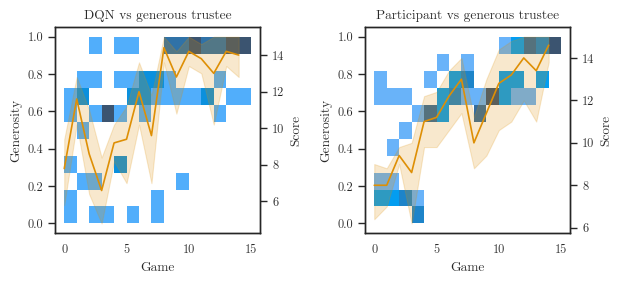

In [61]:
nAgents = 1
nGames = 15
pid = 'sree'

seed=477
nNeurons=67
tau=2
alpha=0.55
gamma=0.53
w_o=0.93
w_i=0.01

emp = pd.read_pickle("data/human_data_cleaned.pkl").query("ID==@pid & player=='investor'")
opponent = emp['opponent'].unique()[0]

agents = []
for n in range(nAgents):
    agents.append(
        DQN(
        'investor',
        ID=f"DQN{n}",
        seed=seed if nAgents==1 else n,
        nNeurons=nNeurons,
        tau=tau,
        alpha=alpha,
        gamma=gamma,
        explore='exponential',
        update='SARSA',
        w_s=1.0,
        w_o=w_o,
        w_i=w_i,
        nGames=nGames)
    )

agentIDs = [agent.ID for agent in agents]
sim = run(agents, nGames=nGames, opponent=opponent).query("ID in @agentIDs")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.histplot(data=sim, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[0], color=palette[0])
ax2 = axes[0].twinx()
sns.lineplot(data=sim, x='game', y='coins', ax=ax2, color=palette[1])
axes[0].set(title=f'DQN vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score')
sns.histplot(data=emp, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[1], color=palette[0])
ax3 = axes[1].twinx()
sns.lineplot(data=emp, x='game', y='coins', ax=ax3, color=palette[1])
axes[1].set(title=f'Participant vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax3.set(ylabel='Score')

plt.tight_layout()

[ 0.    3.75  7.5  11.25 15.  ]


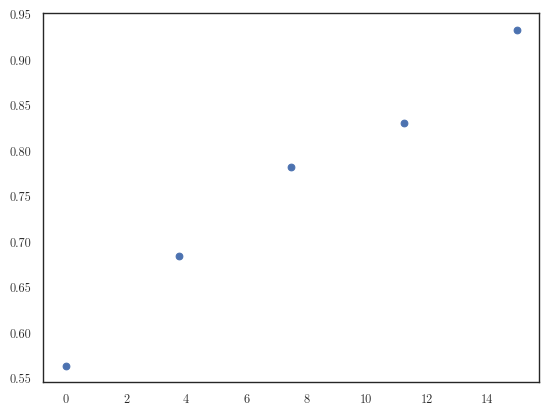

In [76]:
nBins=5
xs = np.linspace(0, 15, nBins)
print(xs)
pid = 'sree'
emp = pd.read_pickle("data/human_data_cleaned.pkl").query("ID==@pid & player=='investor'")
ys = []
for n in range(nBins):
    left = n*int(15/nBins)
    right = (n+1)*int(15/nBins)
    # print(left, right)
    empN = emp.query("@left <= game & game < @right")
    ys.append(empN['coins'].mean() / 15)
plt.scatter(xs, ys)

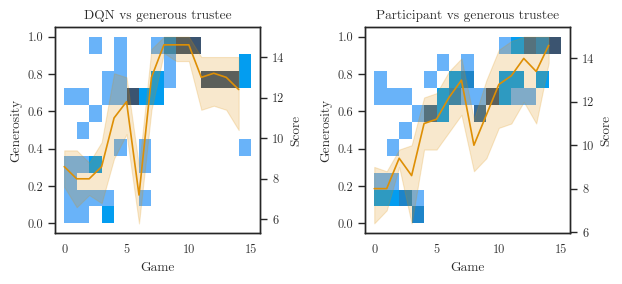

In [79]:
nAgents = 1
nGames = 15
pid = 'sree'

seed=71
nNeurons=93
tau=3.7
alpha=0.08
gamma=0.3
w_o=0.53
w_i=0.42

emp = pd.read_pickle("data/human_data_cleaned.pkl").query("ID==@pid & player=='investor'")
opponent = emp['opponent'].unique()[0]

agents = []
for n in range(nAgents):
    agents.append(
        DQN(
        'investor',
        ID=f"DQN{n}",
        seed=seed if nAgents==1 else n,
        nNeurons=nNeurons,
        tau=tau,
        alpha=alpha,
        gamma=gamma,
        explore='exponential',
        update='SARSA',
        w_s=1.0,
        w_o=w_o,
        w_i=w_i,
        nGames=nGames)
    )

agentIDs = [agent.ID for agent in agents]
sim = run(agents, nGames=nGames, opponent=opponent).query("ID in @agentIDs")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.histplot(data=sim, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[0], color=palette[0])
ax2 = axes[0].twinx()
sns.lineplot(data=sim, x='game', y='coins', ax=ax2, color=palette[1])
axes[0].set(title=f'DQN vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score')
sns.histplot(data=emp, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[1], color=palette[0])
ax3 = axes[1].twinx()
sns.lineplot(data=emp, x='game', y='coins', ax=ax3, color=palette[1])
axes[1].set(title=f'Participant vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax3.set(ylabel='Score')

plt.tight_layout()

loss penalty, gen03, score07

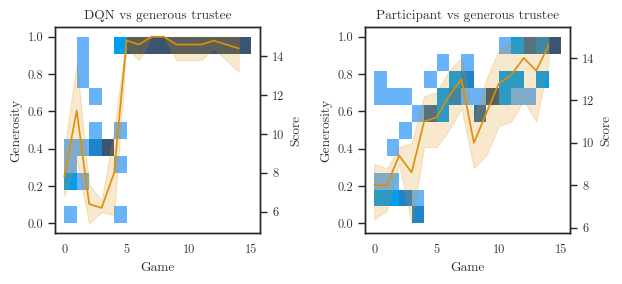

In [80]:
nAgents = 1
nGames = 15
pid = 'sree'

seed=100
nNeurons=22
tau=8.5
alpha=0.21
gamma=0.42
w_o=0.31
w_i=0.64

emp = pd.read_pickle("data/human_data_cleaned.pkl").query("ID==@pid & player=='investor'")
opponent = emp['opponent'].unique()[0]

agents = []
for n in range(nAgents):
    agents.append(
        DQN(
        'investor',
        ID=f"DQN{n}",
        seed=seed if nAgents==1 else n,
        nNeurons=nNeurons,
        tau=tau,
        alpha=alpha,
        gamma=gamma,
        explore='exponential',
        update='SARSA',
        w_s=1.0,
        w_o=w_o,
        w_i=w_i,
        nGames=nGames)
    )

agentIDs = [agent.ID for agent in agents]
sim = run(agents, nGames=nGames, opponent=opponent).query("ID in @agentIDs")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.histplot(data=sim, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[0], color=palette[0])
ax2 = axes[0].twinx()
sns.lineplot(data=sim, x='game', y='coins', ax=ax2, color=palette[1])
axes[0].set(title=f'DQN vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score')
sns.histplot(data=emp, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[1], color=palette[0])
ax3 = axes[1].twinx()
sns.lineplot(data=emp, x='game', y='coins', ax=ax3, color=palette[1])
axes[1].set(title=f'Participant vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax3.set(ylabel='Score')

plt.tight_layout()

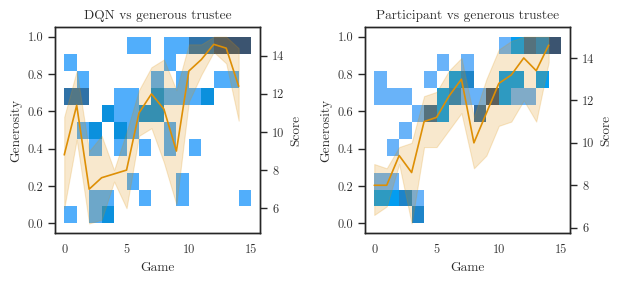

In [81]:
nAgents = 1
nGames = 15
pid = 'sree'

seed=980
nNeurons=55
tau=1.9000000000000001
alpha=0.86
gamma=0.2
w_o=1
w_i=0.04

emp = pd.read_pickle("data/human_data_cleaned.pkl").query("ID==@pid & player=='investor'")
opponent = emp['opponent'].unique()[0]

agents = []
for n in range(nAgents):
    agents.append(
        DQN(
        'investor',
        ID=f"DQN{n}",
        seed=seed if nAgents==1 else n,
        nNeurons=nNeurons,
        tau=tau,
        alpha=alpha,
        gamma=gamma,
        explore='exponential',
        update='SARSA',
        w_s=1.0,
        w_o=w_o,
        w_i=w_i,
        nGames=nGames)
    )

agentIDs = [agent.ID for agent in agents]
sim = run(agents, nGames=nGames, opponent=opponent).query("ID in @agentIDs")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.histplot(data=sim, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[0], color=palette[0])
ax2 = axes[0].twinx()
sns.lineplot(data=sim, x='game', y='coins', ax=ax2, color=palette[1])
axes[0].set(title=f'DQN vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score')
sns.histplot(data=emp, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[1], color=palette[0])
ax3 = axes[1].twinx()
sns.lineplot(data=emp, x='game', y='coins', ax=ax3, color=palette[1])
axes[1].set(title=f'Participant vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax3.set(ylabel='Score')

plt.tight_layout()

ks test, gen08 score02

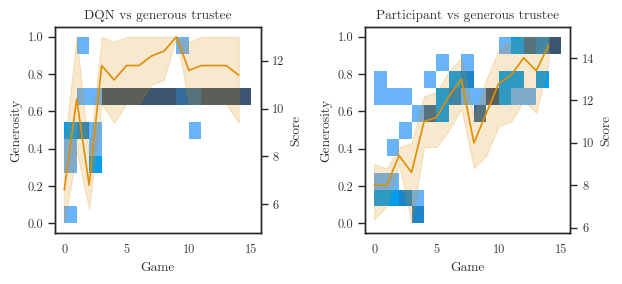

In [83]:
nAgents = 1
nGames = 15
pid = 'sree'

seed=787
nNeurons=41
tau=6.4
alpha=0.59
gamma=0.89
w_o=0.74
w_i=0.35000000000000003

emp = pd.read_pickle("data/human_data_cleaned.pkl").query("ID==@pid & player=='investor'")
opponent = emp['opponent'].unique()[0]

agents = []
for n in range(nAgents):
    agents.append(
        DQN(
        'investor',
        ID=f"DQN{n}",
        seed=seed if nAgents==1 else n,
        nNeurons=nNeurons,
        tau=tau,
        alpha=alpha,
        gamma=gamma,
        explore='exponential',
        update='SARSA',
        w_s=1.0,
        w_o=w_o,
        w_i=w_i,
        nGames=nGames)
    )

agentIDs = [agent.ID for agent in agents]
sim = run(agents, nGames=nGames, opponent=opponent).query("ID in @agentIDs")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.histplot(data=sim, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[0], color=palette[0])
ax2 = axes[0].twinx()
sns.lineplot(data=sim, x='game', y='coins', ax=ax2, color=palette[1])
axes[0].set(title=f'DQN vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score')
sns.histplot(data=emp, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[1], color=palette[0])
ax3 = axes[1].twinx()
sns.lineplot(data=emp, x='game', y='coins', ax=ax3, color=palette[1])
axes[1].set(title=f'Participant vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax3.set(ylabel='Score')

plt.tight_layout()

ks, .5 .5

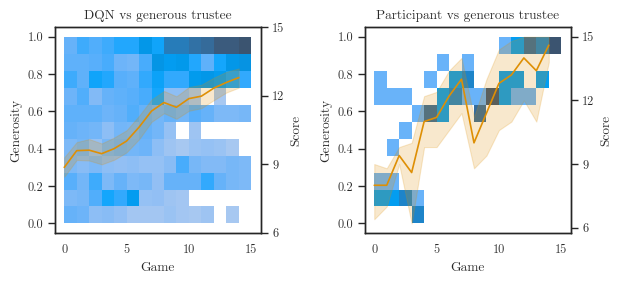

In [92]:
nAgents = 30
nGames = 15
pid = 'sree'

seed=630
nNeurons=48
tau=4.9
alpha=0.07
gamma=0.13
w_o=0.49
w_i=0.54

emp = pd.read_pickle("data/human_data_cleaned.pkl").query("ID==@pid & player=='investor'")
opponent = emp['opponent'].unique()[0]

agents = []
for n in range(nAgents):
    agents.append(
        DQN(
        'investor',
        ID=f"DQN{n}",
        seed=seed if nAgents==1 else n,
        nNeurons=nNeurons,
        tau=tau,
        alpha=alpha,
        gamma=gamma,
        explore='exponential',
        update='SARSA',
        w_s=1.0,
        w_o=w_o,
        w_i=w_i,
        nGames=nGames)
    )

agentIDs = [agent.ID for agent in agents]
sim = run(agents, nGames=nGames, opponent=opponent).query("ID in @agentIDs")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.histplot(data=sim, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[0], color=palette[0])
ax2 = axes[0].twinx()
sns.lineplot(data=sim, x='game', y='coins', ax=ax2, color=palette[1])
axes[0].set(title=f'DQN vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score', yticks=((6,9,12,15)))
sns.histplot(data=emp, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[1], color=palette[0])
ax3 = axes[1].twinx()
sns.lineplot(data=emp, x='game', y='coins', ax=ax3, color=palette[1])
axes[1].set(title=f'Participant vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax3.set(ylabel='Score', yticks=((6,9,12,15)))

plt.tight_layout()